<h2><span style="color:#A8A8A8;">   Actividad #02:</span></h2> 
 <strong><br><br><span style="font-size: 4em; margin-left:0em;text-align:center">Laboratorio:Spice</span><br><br></strong> 
 
 
 <img src="https://raw.githubusercontent.com/JaimeOro/FFI-Actividad01/main/unirLogo.PNG" style="float:center; height: 200; margin-right: auto ; margin-bottom: 0.0em; width: 350px;  margin-left: auto;">
 
 <br><br><br>
<ul style="list-style-type:none;   float:left">
        <li>   Asignatura:  <strong>Fundamentos Físicos de la Informática </strong></li>
        <li>     Profesor:  <strong>  Alberto Corbi Bellot</strong> </li>
        <li>   Fecha:   <strong>06 de enero de 2021 </strong> </li> 
        <li>    Autor: <strong> Alex Sun </strong></li></ul>

# Objetivo del laboratorio

El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos SPICE y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

# El estándar SPICE

SPICE es una abreviabiación de Simulation Program with Integrated Circtuit Emphasis. Se trata básicamente de un método estándar para describir circuitos usando texto plano en lugar de una representación gráfica (o esquemática). A esta descripción en texto se la llama también netlist y básicamente se corresponde con la lista de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión. Los ficheros netlist pueden tener extensiones .cir, .net, .ckt, ó .sp y es muy común encontrárselos con cualquiera de estas.

Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta open source y regidos por distintas comunidades de usuarios y programadores.

### <a id="1"></a> Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente).

| Intérprete | Licencia | Fabricante | Características|
 :------: |:----------: | :---------- |:---------- |
       Ahkab|  GPL  |Giuseppe Venturini|Basado en Python
      LTspice|   Freeware | Linear Technology, Analog Devices|supporte para caracteres Unicode 
      Ngspice|  Newbsd  | Berkeley ápice | Basado en C
      OrCAD|  Propietario  | Cadence Design Systems | Basado en C y C++

### <a id="2"></a> ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces?

La diferencia es que C utiliza compiladores con la finalidad de traducir lo ejecutable en ordenes que ejecuta el procesador y Spice, en cambio es un lenguaje interpretado, precisa de intérpretes software para poder ejecutar.<br>
    "Así pues con Spice necesitamos volver a entrar en el programa y con C ejecutar desde el comando el lenguaje ya escrito.<br>
 

# Elementos de un netlist

Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

# Comentarios

La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un *. Ejemplo:

spice<br>
 Mi primer circuito<br>
 *Otro comentario<br>
 *más comentarios<br>
 *

# Dispositivos básicos de un circuito

Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo, tales como resistencias, condensadores, bobinas, interruptores, hilos y fuentes de alimentación. Para distinguir uno de otro, se reserva una letra característica: V para fuentes de alimentación, R para resistencias, C para condensadores y L para bobinas. También es posible usar estas letras en su versión en minúscula (r, v, c, l, etc.). Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

*Una resistencia<br>
 R1<br>
*Otra resistencia<br>
 R2<br>
*Fuente de alimentación<br>
 V<br>
*Un condensador<br>
 Cprincipal<br>

# Conexiones


A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles son los puntos de unión tanto a un lado como al otro del elemento. Así es como Spice sabe qué está conectado a qué: porque comparten un punto (o nodo, aunque este término se reserva sobretodo a uniones de más de dos elementos) que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una numeración secuencial: 0...n. La enumeración de los puntos de unión es completamente a nuestro criterio.



 *Una resistencia<br>
 *entre cables 0 y 1<br>
 R1 0 1<br>

Sólo es necesario seguir un criterio: en el caso de una fuente de alimentación, el nodo que pondremos primero será aquel que está más cerca del borne positivo. Ejemplo:

spice<br>
 *Para una fuente indicamos primeramente conexión a nodo positivo.<br>
 v 2 3 type=vdc vdc=1

En el caso de LTspice no es necesario indicar los parámetros type=vdc y vdc=X, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

spice<br>
*Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice<br>
v 0 1 10

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

<img src="https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true" style="float:left; height: 320px; margin-right: 1% ; margin-bottom: 0.0em">

# Unidades en SPICE 

Las unidades de las magnitudes características del circuito son siempre unidades del Sistema Internacional y no es necesario indicarlo explícitamente en el netlist.

La forma de especificar múltiplos de estas cantidades es añadiendo una letra. Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son k para "kilo-," m para "mili?" y u para "micro?".

### <a id="3"></a> Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

|Prefijo| Símbolo | ${10^{n}}$ |  Prefijo| Símbolo | ${10^{n}}$ | 
 :------ :|:------: |:------ |:------ |:---- |:---- |
 Exa  | E  | ${10^{18}}$ | Deci  | d    | ${10^{-1}}$
 Peta | P  | ${10^{15}}$ | Centi | c    | ${10^{-2}}$
 Tera | T  | ${10^{12}}$ | Mili  | m    | ${10^{-3}}$
 Giga | G  | ${10^{9}}$  | Micro | $\mu$| ${10^{-6}}$
 Mega | M  | ${10^{6}}$  | Nano  | n    | ${10^{-9}}$
 Kilo | k  | ${10^{3}}$  | Pico  | p    | ${10^{-12}}$
 Hecto| h  | ${10^{2}}$  | Femto | f    | ${10^{-15}}$
 Deca | da | ${10^{1}}$  | Atto  | a    | ${10^{-19}}$

En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (vdc) o alterna (ac).

 *Una resistencia de 5 Ohmios<br>
 R2 1 0 5<br>
 *Una pila de 10 Voltios (continua)<br>
 V1 1 0 type=vdc vdc=10<br>
 *Una resistencia de 5 kΩ<br>
 RX 2 4 5k<br>

### <a id="4"></a> ¿Qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces?

| Magnitud | Nombre | Simbolo |
:------ :|:------ |:------ |
La longitud | metros | (m)
La masa | kilogramo | (kg)
El tiempo | segundos | (s)
La corriente eléctrica | amperio | (A)
La temperatura | Kelvin | (K)
La frecuencia | hercio | (Hz)
La energía| julio | (j)
La potencia| Vatio | (W)
La carga eléctrica | Culombio  |(C)
El potencial electrostático | voltios | (V)
La resistencia eléctrica | Ohmio |(Ω)

# Valores iniciales

Aparecen justo al final de la definición del componente (ic). Suelen aplicarse principalmente con condensadores.

*Una condensador inicialmente no cargado<br>
 c 1 0 1u ic=0

# Fin del circuito

El fin de la descripción de un netlist se especifica mediante el comando .end.<br>

spice<br>
 *Mi primer circuito<br>
 V 1 0 vdc=10 type=vdc<br>
 R 1 0 5<br>
 *Fin del circuito<br>
 .end<br>

# Comandos SPICE para circuitos en corriente continua

Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar la salida de la simulación. Los comandos en Spice empiezan por un . y suelen escribirse justo al final del circuito, pero antes del comando .end.

Mi primer circuito<br>
 * Aquí van los componentes<br>
 R 1 0 6k<br>
 ...<br>
 * Comandos<br>
 .op<br>
 ...<br>
 * Fin del circuito<br>
 .end<br>

### <a id="5"></a> Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta.

Yo encajaria Spice dentro de específicos de dominio, ya quees un lenguaje de simulación que crea circuitos de forma definida.

Veamos los principales comandos de simulación:<br>

.op es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.<br>
.dc es uy parecido al comando .op pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B. En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:

spice<br>
 * Variamos el valor del voltaje<br>
 * de la fuente "v" de 1 a 1000v
 * en pasos de 5 voltios<br>
 v 1 0 type=vdc vdc=10<br>
 .dc v 1 start=1 stop=1000 step=20<br>
 v2a 2 4 type=vdc vdc=9<br>
 * Igual para v2a. Se ignora su voltaje de 9V<br>
 .dc v2a start=0 stop=10 step=2<br>

El comando .tran realiza un análisis en el tiempo de los parámetros del circuito. Si no se emplea la directiva uic (use initial conditions) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo tfinal. y en intervalos tstep. Si empleamos un varlor distinto para parámetro uic, entonces se hará uso de las condiciones iniciales definidas para cada componente (típicamente ic=X en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).

X, Y y Z tienen, evidentemente unidades de tiempo en el S.I. (segundos).

### <a id="6"></a> El parámetro uic puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la documentación de Ahkab.

UIC (User Initial conditions): se usa para especificar el estado del circuito en el tiempo. Tiene tres valores.<br>
Cuando uic = 0: Todos los voltajes y corrientes de nodo a través de las fuentes v,h,e estan en t = tstart<br>
Cuando uic = 1: El estado en ‘t = tstart es el último resultado de un análisis OP<br>
Cuando uic = 2: uic = 1 en el que se establecen los valores de corrientes a través de inductores y voltajes en condensadores especificados en su ic.<br>
Cuando uic = 3: Cargue un ic proporcionado por el usuario. Esto requiere una directiva .ic en algún lugar de la lista de red.

# Intérprete SPICE que vamos a usar: Ahkab

Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.

### <a id="7"></a> Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown.

| Lenguajes | Diseñador | Sistema de tipos |
:------ :|:------ |:------ |
C | Dennis Ritchie | Débil, estático
C++ | Bjarne Stroustrup | Fuerte, estático, nominativo
Python | Guido van Rossum | Fuertemente tipado, dinámico
java | Sun Microsystems | Fuerte, estático

### <a id="8"></a> Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).<br>

Akhab es un simulador de circuito electrónico tipo SPICE escrito en Python. El creador de este software es Giuseppe Venturini. El código debe ser fácil de leer y modificar, el lenguaje principal es Python y es independiente de la plataforma. Tiene una versión que es el v0.18, que fue lanzado el 12 de julio de 2015, cuya licencia es GPL. <br>

Akhab se puede ejecutar como una biblioteca de Python y también se puede ejecutar desde la línea de comandos con un archivo netlist. 

# Trabajo práctico

Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.

# Instalación de bibliotecas necesarias

Si estás utilizando Anaconda, asegúrate de tener su entorno activado:

cmd<br>
 C:\> conda activate base (en el caso de Windows)<br>
ó<br>

$ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)

En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando conda (visita la sección de Environment Variables del Panel de Control). Si has instalado Anaconda con esta opción marcada, ya no tienes que preocuparte por ello.

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado. La configuración de Python en VS Code está bien explicada su documentación.

<img src="https://raw.githubusercontent.com/microsoft/vscode-python/main/images/InterpreterSelectionZoom.gif" style="float:left; height: 320px; margin-right: 1% ; margin-bottom: 0.0em"> 

Ahora ya puedes instalar Ahkab:<br>

 (base) $ pip install ahkab

También puedes instalar Ahkab directamente desde este mismo notebook:

In [10]:
!pip install ahkab

  Using cached ahkab-0.18.tar.gz (163 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
  Created wheel for ahkab: filename=ahkab-0.18-py3-none-any.whl size=189111 sha256=88629b036b7ba74b71b4779549e3addedb455d9f482db75a8e6e6c242c829209
  Stored in directory: c:\users\sun13\appdata\local\pip\cache\wheels\bb\c8\08\71ae30d637bba3f39b09a44876c8e6cc7035642ea71a74b6d4
Successfully built ahkab


Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el REPL como desde un entorno Jupyter (Jupyter, Jupyterlab, VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su documentación oficial.

Como vamos a pintar algunas gráficas, necesitamos instlar matplotlib. Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda:

In [12]:
!conda install -y -c conda-forge matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sun13\anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py38_0 --> conda-forge::conda-4.9.2-py38haa244fe_0




conda-4.9.2          | 3.1 MB    |            |   0% 
conda-4.9.2          | 3.1 MB    |            |   1% 
conda-4.9.2          | 3.1 MB    | #4         



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [81]:
import pylab as plt
import ahkab

### <a id="9"></a> ¿Qué es y para qué sirve PyLab?

PyLab es una interfaz de procedimiento para la biblioteca de trazado orientada a objetos Matplotlib y también es un módulo de conveniencia que importa a granel matplotlib.pyplot (para trazar) y NumPy (para Matemáticas y trabajar con matrices) en un solo espacio de nombre.<br>

La interfaz pylab es recomendado para cálculos interactivos y trazado, ya que reduce la escritura.

# Circuitos sencillos para trabjar con la ley de Ohm:

La mal llamada ley de Ohm reza que el voltaje (la energía por unidad de carga) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad (I) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material (R) en el que está desplazándose dicha corriente. Matemáticamente:
$$V=I⋅R$$

### <a id="10"></a> Comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.

$$V=I⋅R$$<br>
$$V=A$$<br>
$$I=\frac{kg·m^{2}}{s^{-3}·A^{-1}}$$<br>
$$R=\frac{kg·m^{2}}{s^{-3}·A^{-2}}$$<br>
Al sustituir los valores en la formula se anulan perfectamente.

Comencemos con el circuito más sencillo posible de todos:

<img src="https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true" style="float:left; height: 320px; margin-right: 1% ; margin-bottom: 0.0em">

Vamos a escribir su contenido (componentes o netlist) en disco con el nombre circuito sencillo.sp. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los comandos mágicos de este entorno de programación literaria. En concreto vamos a utilizar %%writefile que guarda los contenidos de una celda como un fichero.

In [82]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [83]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

Separamos la información del netlist (componentes) de los análisis (uno de tipo op y otro de tipo dc):

In [84]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


### <a id="11"></a> ¿Qué tipo de estructura de Python es lista_de_análisis?

Es una secuencia de valores encerrados entre corchetes y separados por comas, además pueden contener cualquier valor y devuelve los resultados que en este caso se almacenan en la citada variable lista_de_análisis.

In [85]:
lista_de_análisis[1]['outfile'] = "simulación dc.tsv"

### <a id="12"></a> Escribe el código Python necesario para identificar qué análisis de lista de análisis son de tipo dc ó tran y sólo añadir la propiedad outfile en estos casos. Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo dc. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo tran y/o dc.

In [86]:
[i for i, d in enumerate(lista_de_análisis) if "dc" in d.values()][0]

1

Ejemplo solución:

In [87]:
for item in enumerate(lista_de_análisis) :
    if item[1]['type']=='op':
        print (item[0])        
    elif item[1]['type']=='tran':
        print (item[0])
    elif item[1]['type']=='dc':
        print (item[0])

0
1


Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método .run de Ahkab:

In [88]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


# Resultados de la simulación .dc

Imprimimos información sobre la simulación de tipo .dc:



In [89]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-06 21:43:35, data file simulación dc.tsv>


Veamos qué variables podemos dibujar para el caso del análisis dc.

In [90]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (V1) con respecto a la intensidad del circuito (I(V1)).

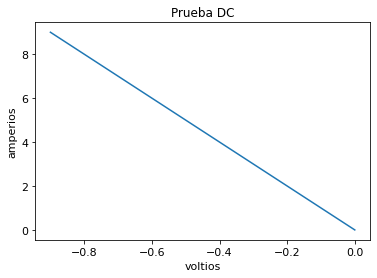

In [91]:
figura = plt.figure()
ax1 = figura.add_subplot(111)
ax1.set_ylabel('amperios')
ax1.set_xlabel('voltios')
plt.title("Prueba DC")
plt.plot(resultados['dc']['I(V1)'], resultados['dc']['V1'], label="Voltaje (V1)")

### <a id="13"></a> Comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede viajar solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. ¿Qué biblioteca estamos usando para graficar?

Observamos que es una recta es decir que es proporcional con los valores que tienen.<br>
Estamos usando matplotlib para graficar.

# Resultados de la simulación .op

El método .results nos devuelve un diccionario con los resultados de la simulación.

In [92]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.9}


### <a id="14"></a> Justifica el sencillo resultado anterior (análisis op). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

op indica el intensidad y voltaje en cada punto del circuito como dice la gráfica.

# Resolución del mismo circuito pero con LTspice

¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [93]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe -ascii -b

### <a id="15"></a> ¿Qué significan las opciones -b y -ascii?

-ascii :Disminuye peligrosamente el aguante del programa.<br>

 –b : marca que ejecute el programa en modo batch 

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión .net:

In [94]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [95]:
lts "circuito sencillo.net"

"C:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Veamos el contenido de la simulación.

In [96]:
%pycat circuito sencillo.log

Error: no such file, variable, URL, history range or macro


Ahora repitamos lo mismo para el análisis .dc:

In [98]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end

Overwriting circuito sencillo.net


In [99]:
lts "circuito sencillo.net"

"C:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Al ejecutar esta simulación, se genera un fichero .raw con los resultados. Es muy parecido al outfile que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete ltspice de Python, el cual podéis instalar directamente desde Jupyter:

In [100]:
!pip install ltspice

Ahora ya podemos leer este fichero .raw y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

In [102]:
import ltspice
l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje
plt.plot(tiempo, voltaje)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'circuito sencillo.raw'

En resumen: hemos usado dos compiladores Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado Ngspice u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo directamente desde línea de comandos:

In [103]:
!ahkab "circuito sencillo.sp"

2021-01-06 21:51:51

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.
Traceback (most recent call last):
  File "c:\users\sun13\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\sun13\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\sun13\anaconda3\Scripts\ahkab.exe\__main__.py", line 7, in <module>
  File "c:\users\sun13\anaconda3\lib\site-packages\ahkab\__main__.py", line 155, in _cli
    ahkab.main(filename=remaning_args[0],
  File "c:\users\sun13\anaconda3\lib\site-packages\ahkab\ahkab.py", line 953, in main
    results.update(run(circ, [an]))
  File "c:\users\sun13\anaconda3\lib\site-packages\ahkab\ahkab.py", line 714, in run
    r = analysis[an_type](circ, **an_item)
  File "c:\users\sun13\anaconda3\lib\site-packages\ahkab\dc_analysis.py", line 685, in op_analysis
    opsolution.write_to_file(filename='stdout')
  File "c


ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V           -9    9.00002e-12    0
I(V1)       A           -0.9  0              0

ELEMENTS OP INFORMATION:



Ejercicio premium: Graficar los datos anteriores con Gnuplot.

# Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

<img src="https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true" style="float:left; height: 320px; margin-right: 1% ; margin-bottom: 0.0em">

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la palabra mágica %writefile. Más info aquí.

In [104]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [105]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis .op:

In [106]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-06 21:53:08, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades V1, V2 y V3 hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (1, 2, etc.). Por ejemplo, podemos calcular el potencial consumido por la resistencia R1 y verás que coincide con el del punto V2 devuelto por Ahkab. Ejercicio: compruébalo tú mismo y refléjalo por escrito.

Cargamos primero todo lo relacionado con Sympy:

In [107]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to


In [108]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

### <a id="16"></a> Reproduce el resto de los valores anteriores de manera manual mediante Sympy (es decir, aplicando la ley de Ohm, pero con un toque computacional). En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (r total). Faltarían el resto de resultados y convertirlos a unidades más vistosas (mediante la orden convert to y .n()).

In [109]:
from sympy.physics.units import Dimension 
from sympy import * 
from sympy.physics.units import convert_to
from sympy.physics.units import kilo
from sympy import symbols, Eq,solve

In [110]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
convert_to(solucion_para_intensidad[0], [amperes]).n(2)

0.0005*ampere

### <a id="17"></a> Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

# Análisis .op de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

### <a id="18"></a> Realiza los análisis .op de los siguientes circuitos. Para ello crea un netlist separado para cada uno donde queden correctamente descritos junto con la simulación (.op). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones sin más).

<img src="https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true" style="float:left; height: 320px; margin-right: 1% ; margin-bottom: 0.0em">

Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

In [111]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [113]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis .op. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila VDD).

In [114]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2021-01-06 21:54:50, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


### <a id="19"></a> Inserta dos pilas virtuales de 0 voltios en el resto de ramas del circuito (Vdummy1 en la rama donde está R5 y Vdummy2 en la rama donde está R3 y R4) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde V1, V2 y V3 tienen cero voltios. Estas pilas nulas son, a todos los efectos, simples cables. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes.

In [115]:
%%writefile "resistencias en paralelo con pilas virtuales 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
Vdummy2 2 3 vdc=0 type=vdc
r5 2 0 470
Vdummy1 2 0 vdc=0 type=vdc
.op
.end

Overwriting resistencias en paralelo con pilas virtuales 1.cir


In [116]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto resultados alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no copies los números a mano, trabaja de manera informáticamente elegante (usando la variable resultados).

# Circuitos en DC que evolucionan con el tiempo

### Carga de un condensador

Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador en serie.

<img src="https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true" style="float:left; height: 320px; margin-right: 1% ; margin-bottom: 0.0em">

Al igual que antes, primero guardamos el circuito en un netlist externo:

In [117]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


### <a id="20"></a> ¿Qué significa el parámetro ic=0? ¿qué perseguimos con un análisis de tipo .tran?

uic = 0: Todos los voltajes y corrientes de nodo a través de las fuentes v,h,e estan en t = tstart<br>
.tran realiza un análisis transitorio desde  (tstart) hasta .tstop'.Utilizando el paso principal y el método especificado

Leamos el circuito:

In [118]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (outfile):

In [119]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

Ejecutamos la simulación:

In [120]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-06 21:55:13, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila.

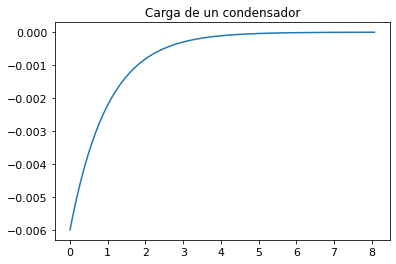

In [121]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

### <a id="21"></a> Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne V1. ¿Por qué son opuestas? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). ¿Qué valores devuelve el análisis de tipo .op? Justifícalo.

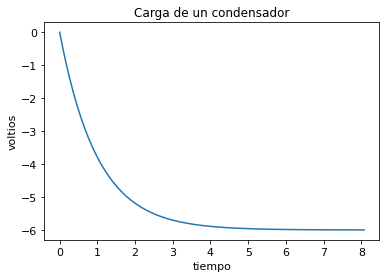

In [124]:
figura = plt.figure()
ax1 = figura.add_subplot(111)
ax1.set_ylabel('voltios')
ax1.set_xlabel('tiempo')
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['v2'], label="Una etiqueta")


Vemos que es opuesto por la posición de las medidas pero sabemos que es igual.<br>
cada vez que aumenta el tiempo se pone cada vez mas negativo los voltios.<br>


# Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo:

<img src="https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true" style="float:left; height: 320px; margin-right: 1% ; margin-bottom: 0.0em">

### <a id="22"></a> Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea.  Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos).

In [125]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [126]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


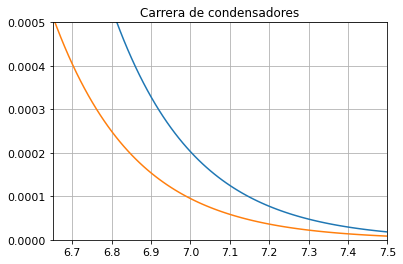

In [127]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")

Ejercicio premium: Repite la simulación con LTspice (invocándolo como comando externo, leyendo los datos de un fichero .raw y volviendo a graficar con Matplotlib.

# Circuitos en corriente alterna


Ejercicio: Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo. Traduce este ejercicio a la versión Spice de Akhab y haz la misma representación. Ahkab utiliza otra sintaxis para expresar la corriente alterna. Esta está descrita en la documentación.

In [128]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Overwriting corriente alterna.net


In [129]:
lts "corriente alterna.net"

"C:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


 # Resumen de lo que se pide


Volved a realizar todos los ejercicios y demos en vuestro propio notebook, explicando con vuestras palabras cada paso, cada gráfica y respondiendo a cada pregunta. Cuidad la belleza, coherencia, narración, explicaciones y gráficas. Todas las gráficas se han pintado con Matplotlib, que es una biblioteca extendidísima en ciencia y tecnología. Es muuuuy bueno que la conozcáis. Aquí tenéis muchos ejemplos.

<a style="text-decoration: none;" href="#0">- Preguntas:Lugar donde encuentras todas las preguntas.</a><br><br>
<a style="text-decoration: none;" href="#1">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente).</a><br><br>
<a style="text-decoration: none;" href="#2">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces?</a><br><br>
<a style="text-decoration: none;" href="#3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.</a><br><br>
<a style="text-decoration: none;" href="#4">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- ¿Qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces?</a><br><br>
<a style="text-decoration: none;" href="#5">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. </a><br><br>
<a style="text-decoration: none;" href="#6">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- El parámetro uic puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la documentación de Ahkab.</a><br><br>
<a style="text-decoration: none;" href="#7">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown.</a><br><br>
<a style="text-decoration: none;" href="#8">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).</a><br><br>
<a style="text-decoration: none;" href="#9">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- ¿Qué es y para qué sirve PyLab?</a><br><br>
<a style="text-decoration: none;" href="#10">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.</a><br><br>
<a style="text-decoration: none;" href="#11">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- ¿Qué tipo de estructura de Python es lista_de_análisis? </a><br><br>
<a style="text-decoration: none;" href="#12">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Escribe el código Python necesario para identificar qué análisis de lista_de_análisis son de tipo dc ó tran y sólo añadir la propiedad outfile en estos casos. Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo dc. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo tran y/o dc. </a><br><br>
<a style="text-decoration: none;" href="#13">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede viajar solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. ¿Qué biblioteca estamos usando para graficar?  </a><br><br>
<a style="text-decoration: none;" href="#14">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Justifica el sencillo resultado anterior (análisis op). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase). </a><br><br>
<a style="text-decoration: none;" href="#15">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- ¿Qué significan las opciones -b y -ascii?</a><br><br>
<a style="text-decoration: none;" href="#16">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Reproduce el resto de los valores anteriores de manera manual mediante Sympy (es decir, aplicando la ley de Ohm, pero con un toque computacional). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (r_total). Faltarían el resto de resultados y convertirlos a unidades más vistosas (mediante la orden convert_to y .n()).</a><br><br>
<a style="text-decoration: none;" href="#17">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy. </a><br><br>
<a style="text-decoration: none;" href="#18">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Realiza los análisis .op de los siguientes circuitos. Para ello crea un netlist separado para cada uno donde queden correctamente descritos junto con la simulación (.op). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones sin más). </a><br><br>
<a style="text-decoration: none;" href="#19">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Inserta dos pilas virtuales de 0 voltios en el resto de ramas del circuito (Vdummy1 en la rama donde está R5 y Vdummy2 en la rama donde está R3 y R4) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde V1, V2 y V3 tienen cero voltios. Estas pilas nulas son, a todos los efectos, simples cables. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes. </a><br><br>
<a style="text-decoration: none;" href="#20">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- ¿Qué significa el parámetro ic=0? ¿qué perseguimos con un análisis de tipo .tran? </a><br><br>
<a style="text-decoration: none;" href="#21">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne V1. ¿Por qué son opuestas? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). ¿Qué valores devuelve el análisis de tipo .op? Justifícalo.</a><br><br>
<a style="text-decoration: none;" href="#22">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea.  Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos).</a><br><br>